# House Prices: Advanced Regression Techniques


# Goal
It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the 
SalePrice variable.


# Submission File Format
The file should contain SalePrice with corresponding Id as--> Id, SalePrice.


# File descriptions

train.csv - The training set

test.csv - The test set

data_description.txt - Full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here

sample_submission.csv - A benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms

Dataset Source - https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview


# First, we will do feature engineering of training data

In [1]:
'''Importing libraries'''

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
'''Reading Training dataset
'''
df = pd.read_csv(filepath_or_buffer="E:\\DataScience\\My Practice Datasets\\House Prices\\train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
print("Dataset (Rows, Columns) : ", df.shape, "\n")
print("Missing Values Check : \n", df.isnull().sum())

Dataset (Rows, Columns) :  (1460, 81) 

Missing Values Check : 
 Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea 

In [4]:
'''Checking training dataset information'''

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

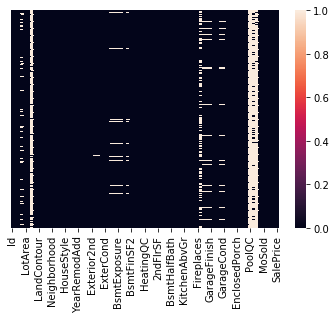

In [5]:
'''Visualizing missing values from each features using heatmap'''
sns.heatmap(df.isnull(), yticklabels=False)

In [6]:
'''Deleting below features as there as many missing values in each of these feaatures'''

df = df.drop(['Id','Alley','PoolQC','Fence','MiscFeature'], axis=1)

In [7]:
'''Checking dataset shape'''

df.shape

(1460, 76)

In [8]:
'''Checking missing values count'''

df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
                ... 
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
Functional         0
Fireplaces         0
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageCars         0
GarageArea         0
GarageQual        81
GarageCond   

In [9]:
'''Checking the mean and median values to impute inplace of missing values in LotFrontage feature'''

print(df['LotFrontage'].isnull().sum())
print(df['LotFrontage'].mean())
print(df['LotFrontage'].median())

259
70.04995836802665
69.0


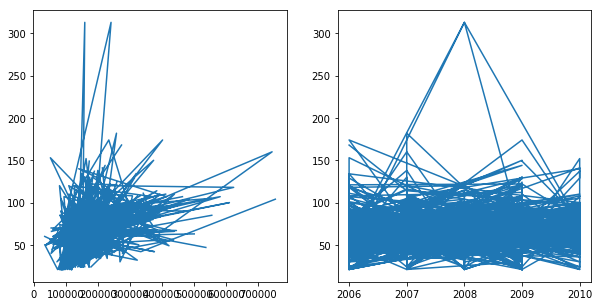

In [10]:
'''Visualising the relationship between LotFrontage vs SalePrice  &  LotFrontage vs YrSold'''

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(df['SalePrice'] ,df['LotFrontage'])
plt.subplot(1,2,2)
plt.plot(df['YrSold'] ,df['LotFrontage'])
plt.show()

In [11]:
'''Imputing LotFrontage feature with its mean value'''

df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=True)

In [12]:
'''Checking missing values count'''

df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage        0
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
                ... 
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
Functional         0
Fireplaces         0
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageCars         0
GarageArea         0
GarageQual        81
GarageCond   

In [13]:
'''Imputing BsmtQual feature with its mode value'''

print(df['BsmtQual'].value_counts())
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64


In [14]:
'''Checking BsmtQual feature's distinct categories and missing values'''

print(df['BsmtQual'].value_counts())
print(df['BsmtQual'].isnull().sum())

TA    686
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
0


In [15]:
'''Imputing FireplaceQu feature with its mode value'''

print(df['FireplaceQu'].value_counts())
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64


In [16]:
'''Checking FireplaceQu feature's distinct categories and missing values'''

print(df['FireplaceQu'].value_counts())
print(df['FireplaceQu'].isnull().sum())

Gd    1070
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64
0


In [17]:
'''Checking GarageType feature's distinct categories and missing values'''

print(df['GarageType'].value_counts())
print(df['GarageType'].isnull().sum())

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
81


In [18]:
'''Imputing GarageType feature with its mode value'''

df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])

In [19]:
'''Checking GarageType feature's distinct categories and missing values'''

print(df['GarageType'].value_counts())
print(df['GarageType'].isnull().sum())

Attchd     951
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
0


In [20]:
'''Checking GarageYrBlt feature's distinct categories and missing values'''

print(df['GarageYrBlt'].value_counts().head(10))
print(df['GarageYrBlt'].median())
print(df['GarageYrBlt'].isnull().sum())

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
2008.0    29
1976.0    29
Name: GarageYrBlt, dtype: int64
1980.0
81


In [21]:
'''Imputing GarageYrBlt feature with its median value'''

df['GarageYrBlt'].fillna(df['GarageYrBlt'].median(), inplace=True)
print(df['GarageYrBlt'].isnull().sum())

0


In [22]:
'''Checking GarageFinish feature's distinct categories and missing values'''

print(df['GarageFinish'].isnull().sum())
print(df['GarageFinish'].value_counts())

81
Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64


In [23]:
'''Imputing GarageFinish feature with its mode value'''

df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
print(df['GarageFinish'].value_counts())
print(df['GarageFinish'].isnull().sum())

Unf    686
RFn    422
Fin    352
Name: GarageFinish, dtype: int64
0


In [24]:
'''Checking GarageQual feature's distinct categories and missing values'''

print(df['GarageQual'].isnull().sum())
print(df['GarageQual'].value_counts())

81
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64


In [25]:
'''Imputing GarageQual feature with its mode value'''

df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
print(df['GarageQual'].value_counts())
print(df['GarageQual'].isnull().sum())

TA    1392
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64
0


In [242]:
'''Checking GarageCond feature's distinct categories and missing values'''

print(df['GarageCond'].isnull().sum())
print(df['GarageCond'].value_counts())

81
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64


In [26]:
'''Imputing GarageCond feature with its mode value'''

df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])
print(df['GarageCond'].isnull().sum())
print(df['GarageCond'].value_counts())

0
TA    1407
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64


In [27]:
'''Checking MasVnrType & MasVnrArea feature's distinct categories and missing values'''

df[['MasVnrType','MasVnrArea']].isnull().sum()

MasVnrType    8
MasVnrArea    8
dtype: int64

In [28]:
print(df['MasVnrType'].value_counts())

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64


In [29]:
'''Imputing MasVnrType feature with its mode value'''

df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
print(df['MasVnrType'].value_counts())
df['MasVnrType'].isnull().sum()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64


0

In [30]:
print(df['MasVnrArea'].head(10))
print(df['MasVnrArea'].mode())

0    196.0
1      0.0
2    162.0
3      0.0
4    350.0
5      0.0
6    186.0
7    240.0
8      0.0
9      0.0
Name: MasVnrArea, dtype: float64
0    0.0
dtype: float64


In [31]:
'''Imputing MasVnrArea feature with its mode value'''

df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])
print(df['MasVnrArea'].isnull().sum())

0


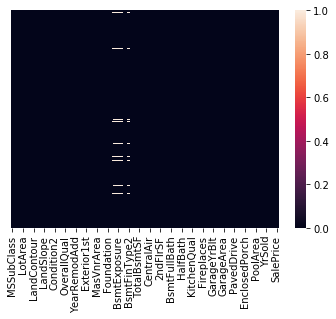

In [32]:
'''Visualizing missing values from each features using heatmap'''

sns.heatmap(df.isnull(), yticklabels=False)

In [33]:
'''Checking BsmtCond feature's distinct categories and missing values'''

print(df['BsmtCond'].isnull().sum())
print(df['BsmtCond'].value_counts())
print(df['BsmtCond'].mode())

37
TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
0    TA
dtype: object


In [34]:
'''Imputing BsmtCond feature with its mode value'''

df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
print(df['BsmtCond'].value_counts())
print(df['BsmtCond'].isnull().sum())

TA    1348
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
0


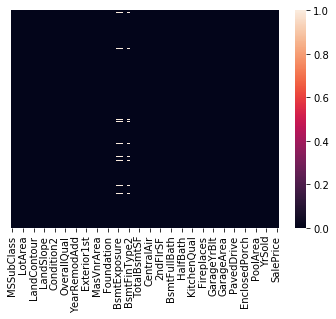

In [35]:
'''Visualizing missing values from each features using heatmap'''
sns.heatmap(df.isnull(), yticklabels=False)

In [36]:
'''Checking BsmtFinType1 feature's distinct categories and missing values'''

print(df['BsmtFinType1'].isnull().sum())
print(df['BsmtFinType1'].value_counts())

37
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64


In [37]:
'''Imputing BsmtFinType1 feature with its mode value'''

df['BsmtFinType1']=df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
print(df['BsmtFinType1'].value_counts())
print(df['BsmtFinType1'].isnull().sum())

Unf    467
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
0


In [38]:
'''Checking BsmtFinType2 feature's distinct categories and missing values'''

print(df['BsmtFinType2'].isnull().sum())
print(df['BsmtFinType2'].value_counts())

38
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64


In [40]:
'''Imputing BsmtFinType2 feature with its mode value'''

df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
print(df['BsmtFinType2'].value_counts())
print(df['BsmtFinType2'].isnull().sum())

Unf    1294
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
0


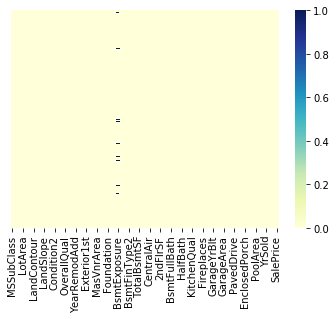

In [41]:
'''Visualizing missing values from each features using heatmap'''
sns.heatmap(df.isnull(), yticklabels=False, cmap='YlGnBu')

In [42]:
'''Checking remaining all missing values from a training dataset'''

len(df.isnull().sum())

76

In [43]:
'''Checking the shape of training dataset'''

df.shape

(1460, 76)

In [44]:
'''Dropping all reamining missing values'''

df.dropna(axis=0, inplace=True)

In [45]:
'''Checking the shape of training dataset again as we have dropped all remaining missing values'''

df.shape

(1421, 76)

In [354]:
'''Checking training dataset information'''

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1421 entries, 0 to 1459
Data columns (total 76 columns):
MSSubClass       1421 non-null int64
MSZoning         1421 non-null object
LotFrontage      1421 non-null float64
LotArea          1421 non-null int64
Street           1421 non-null object
LotShape         1421 non-null object
LandContour      1421 non-null object
Utilities        1421 non-null object
LotConfig        1421 non-null object
LandSlope        1421 non-null object
Neighborhood     1421 non-null object
Condition1       1421 non-null object
Condition2       1421 non-null object
BldgType         1421 non-null object
HouseStyle       1421 non-null object
OverallQual      1421 non-null int64
OverallCond      1421 non-null int64
YearBuilt        1421 non-null int64
YearRemodAdd     1421 non-null int64
RoofStyle        1421 non-null object
RoofMatl         1421 non-null object
Exterior1st      1421 non-null object
Exterior2nd      1421 non-null object
MasVnrType       1421 no

In [355]:
'''Saving cleaned training dataset for later use'''

df.to_csv(path_or_buf="E:\\DataScience\\My Practice Datasets\\house_prices.csv", index=False)

In [356]:
'''Checking 1st 5 records of the cleaned training dataset'''

df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


# Now we will do feature engineering of test data

In [ ]:
#NOTE : We will follow the same feature engineering steps as we have performed to clean training dataset

In [357]:
test_df = pd.read_csv(filepath_or_buffer="E:\\DataScience\\My Practice Datasets\\House Prices\\test.csv")
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [358]:
print(test_df.shape, "\n")
print(test_df.info())

(1459, 80) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st  

In [359]:
test_df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu       730
GarageType         76
GarageYrBlt        78
GarageFinish       78
GarageCars          1
GarageArea          1
GarageQual         78
GarageCond

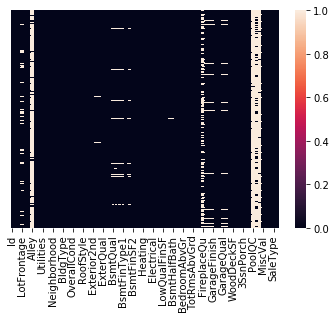

In [360]:
sns.heatmap(test_df.isnull(), yticklabels=False)

In [361]:
test_df = test_df.drop(['Id','Alley','PoolQC','Fence','MiscFeature'], axis=1)
test_df.shape

(1459, 75)

In [362]:
test_df.isnull().sum()

MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          2
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          44
BsmtCond          45
                ... 
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        1
TotRmsAbvGrd       0
Functional         2
Fireplaces         0
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual   

In [363]:
print(test_df['MSZoning'].value_counts())
print(test_df['MSZoning'].isnull().sum())

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64
4


In [364]:
test_df['MSZoning']=test_df['MSZoning'].fillna(test_df['MSZoning'].mode()[0])
print(test_df['MSZoning'].value_counts())
print(test_df['MSZoning'].isnull().sum())

RL         1118
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64
0


In [365]:
print(test_df['LotFrontage'].isnull().sum())
print(test_df['LotFrontage'].head())
print(test_df['LotFrontage'].mean())

227
0    80.0
1    81.0
2    74.0
3    78.0
4    43.0
Name: LotFrontage, dtype: float64
68.58035714285714


In [366]:
test_df['LotFrontage'].fillna(test_df['LotFrontage'].mean(), inplace=True)

In [367]:
print(test_df['LotFrontage'].isnull().sum())

0


In [368]:
print(test_df['Utilities'].isnull().sum())
print(test_df['Utilities'].value_counts())

2
AllPub    1457
Name: Utilities, dtype: int64


In [369]:
test_df['Utilities']=test_df['Utilities'].fillna(test_df['Utilities'].mode()[0])

In [370]:
print(test_df['Utilities'].isnull().sum())
print(test_df['Utilities'].value_counts())

0
AllPub    1459
Name: Utilities, dtype: int64


In [371]:
print(test_df['MasVnrType'].isnull().sum())
print(test_df['MasVnrType'].value_counts())

16
None       878
BrkFace    434
Stone      121
BrkCmn      10
Name: MasVnrType, dtype: int64


In [372]:
test_df['MasVnrType']=test_df['MasVnrType'].fillna(test_df['MasVnrType'].mode()[0])
print(test_df['MasVnrType'].isnull().sum())
print(test_df['MasVnrType'].value_counts())

0
None       894
BrkFace    434
Stone      121
BrkCmn      10
Name: MasVnrType, dtype: int64


In [373]:
print(test_df['MasVnrArea'].isnull().sum())
print(test_df['MasVnrArea'].median())

15
0.0


In [374]:
test_df['MasVnrArea']=test_df['MasVnrArea'].fillna(test_df['MasVnrArea'].median())

In [375]:
print(test_df['MasVnrArea'].isnull().sum())

0


In [376]:
print(test_df['BsmtQual'].isnull().sum())
print(test_df['BsmtQual'].value_counts())

44
TA    634
Gd    591
Ex    137
Fa     53
Name: BsmtQual, dtype: int64


In [377]:
test_df['BsmtQual']=test_df['BsmtQual'].fillna(test_df['BsmtQual'].mode()[0])
print(test_df['BsmtQual'].isnull().sum())
print(test_df['BsmtQual'].value_counts())

0
TA    678
Gd    591
Ex    137
Fa     53
Name: BsmtQual, dtype: int64


In [378]:
print(test_df['BsmtCond'].isnull().sum())
print(test_df['BsmtCond'].value_counts())

45
TA    1295
Fa      59
Gd      57
Po       3
Name: BsmtCond, dtype: int64


In [379]:
test_df['BsmtCond']=test_df['BsmtCond'].fillna(test_df['BsmtCond'].mode()[0])
print(test_df['BsmtCond'].isnull().sum())
print(test_df['BsmtCond'].value_counts())

0
TA    1340
Fa      59
Gd      57
Po       3
Name: BsmtCond, dtype: int64


In [380]:
print(test_df['BsmtFullBath'].isnull().sum())
print(test_df['BsmtFullBath'].value_counts())

2
0.0    849
1.0    584
2.0     23
3.0      1
Name: BsmtFullBath, dtype: int64


In [381]:
test_df['BsmtFullBath']=test_df['BsmtFullBath'].fillna(test_df['BsmtFullBath'].mode()[0])
print(test_df['BsmtFullBath'].isnull().sum())
print(test_df['BsmtFullBath'].value_counts())

0
0.0    851
1.0    584
2.0     23
3.0      1
Name: BsmtFullBath, dtype: int64


In [382]:
print(test_df['BsmtHalfBath'].isnull().sum())
print(test_df['BsmtHalfBath'].value_counts())

2
0.0    1364
1.0      91
2.0       2
Name: BsmtHalfBath, dtype: int64


In [383]:
test_df['BsmtHalfBath']=test_df['BsmtHalfBath'].fillna(test_df['BsmtHalfBath'].mode()[0])
print(test_df['BsmtHalfBath'].isnull().sum())
print(test_df['BsmtHalfBath'].value_counts())

0
0.0    1366
1.0      91
2.0       2
Name: BsmtHalfBath, dtype: int64


In [384]:
print(test_df['FireplaceQu'].isnull().sum())
print(test_df['FireplaceQu'].value_counts())

730
Gd    364
TA    279
Fa     41
Po     26
Ex     19
Name: FireplaceQu, dtype: int64


In [385]:
test_df['FireplaceQu']=test_df['FireplaceQu'].fillna(test_df['FireplaceQu'].mode()[0])
print(test_df['FireplaceQu'].isnull().sum())
print(test_df['FireplaceQu'].value_counts())

0
Gd    1094
TA     279
Fa      41
Po      26
Ex      19
Name: FireplaceQu, dtype: int64


In [386]:
print(test_df['GarageType'].isnull().sum())
print(test_df['GarageType'].value_counts())

76
Attchd     853
Detchd     392
BuiltIn     98
2Types      17
Basment     17
CarPort      6
Name: GarageType, dtype: int64


In [387]:
test_df['GarageType']=test_df['GarageType'].fillna(test_df['GarageType'].mode()[0])
print(test_df['GarageType'].isnull().sum())
print(test_df['GarageType'].value_counts())

0
Attchd     929
Detchd     392
BuiltIn     98
2Types      17
Basment     17
CarPort      6
Name: GarageType, dtype: int64


In [391]:
print(test_df['GarageYrBlt'].isnull().sum())
print(test_df['GarageYrBlt'].mode())

78
0    2005.0
dtype: float64


In [392]:
test_df['GarageYrBlt']=test_df['GarageYrBlt'].fillna(test_df['GarageYrBlt'].mode()[0])
print(test_df['GarageYrBlt'].isnull().sum())
print(test_df['GarageYrBlt'].value_counts().head())

0
2005.0    155
2007.0     66
2006.0     56
2004.0     46
2003.0     42
Name: GarageYrBlt, dtype: int64


In [393]:
print(test_df['GarageFinish'].isnull().sum())
print(test_df['GarageFinish'].value_counts())

78
Unf    625
RFn    389
Fin    367
Name: GarageFinish, dtype: int64


In [394]:
test_df['GarageFinish']=test_df['GarageFinish'].fillna(test_df['GarageFinish'].mode()[0])
print(test_df['GarageFinish'].isnull().sum())
print(test_df['GarageFinish'].value_counts())

0
Unf    703
RFn    389
Fin    367
Name: GarageFinish, dtype: int64


In [395]:
print(test_df['GarageQual'].isnull().sum())
print(test_df['GarageQual'].value_counts())

78
TA    1293
Fa      76
Gd      10
Po       2
Name: GarageQual, dtype: int64


In [396]:
test_df['GarageQual']=test_df['GarageQual'].fillna(test_df['GarageQual'].mode()[0])
print(test_df['GarageQual'].isnull().sum())
print(test_df['GarageQual'].value_counts())

0
TA    1371
Fa      76
Gd      10
Po       2
Name: GarageQual, dtype: int64


In [397]:
print(test_df['GarageCond'].isnull().sum())
print(test_df['GarageCond'].value_counts())

78
TA    1328
Fa      39
Po       7
Gd       6
Ex       1
Name: GarageCond, dtype: int64


In [398]:
test_df['GarageCond']=test_df['GarageCond'].fillna(test_df['GarageCond'].mode()[0])
print(test_df['GarageCond'].isnull().sum())
print(test_df['GarageCond'].value_counts())

0
TA    1406
Fa      39
Po       7
Gd       6
Ex       1
Name: GarageCond, dtype: int64


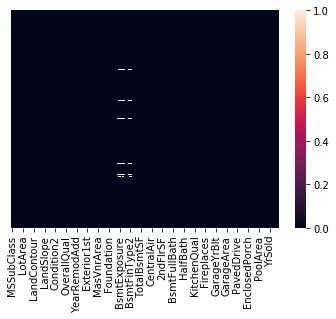

In [399]:
sns.heatmap(test_df.isnull(), yticklabels=False)

In [400]:
print(test_df['BsmtExposure'].isnull().sum())
print(test_df['BsmtExposure'].value_counts())

44
No    951
Av    197
Gd    142
Mn    125
Name: BsmtExposure, dtype: int64


In [401]:
test_df['BsmtExposure']=test_df['BsmtExposure'].fillna(test_df['BsmtExposure'].mode()[0])
print(test_df['BsmtExposure'].isnull().sum())
print(test_df['BsmtExposure'].value_counts())

0
No    995
Av    197
Gd    142
Mn    125
Name: BsmtExposure, dtype: int64


In [402]:
print(test_df['BsmtFinSF1'].isnull().sum())
print(test_df['BsmtFinSF1'].mode())
print(test_df['BsmtFinSF1'].value_counts().head())

1
0    0.0
dtype: float64
0.0      462
24.0      15
276.0      6
602.0      6
300.0      5
Name: BsmtFinSF1, dtype: int64


In [403]:
test_df['BsmtFinSF1']=test_df['BsmtFinSF1'].fillna(test_df['BsmtFinSF1'].mode()[0])
print(test_df['BsmtFinSF1'].isnull().sum())
print(test_df['BsmtFinSF1'].value_counts().head())

0
0.0      463
24.0      15
276.0      6
602.0      6
300.0      5
Name: BsmtFinSF1, dtype: int64


In [404]:
print(test_df['BsmtFinSF2'].isnull().sum())
print(test_df['BsmtFinSF2'].mode())
print(test_df['BsmtFinSF2'].value_counts().head())

1
0    0.0
dtype: float64
0.0      1278
162.0       3
294.0       3
483.0       3
144.0       2
Name: BsmtFinSF2, dtype: int64


In [405]:
test_df['BsmtFinSF2']=test_df['BsmtFinSF2'].fillna(test_df['BsmtFinSF1'].mode()[0])
print(test_df['BsmtFinSF2'].isnull().sum())
print(test_df['BsmtFinSF2'].value_counts().head())

0
0.0      1279
162.0       3
294.0       3
483.0       3
144.0       2
Name: BsmtFinSF2, dtype: int64


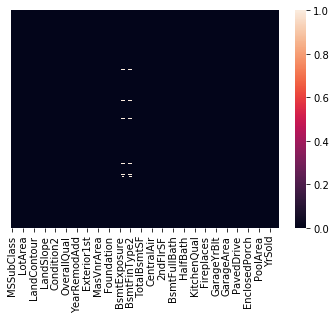

In [406]:
sns.heatmap(test_df.isnull(), yticklabels=False)

In [407]:
test_df.shape

(1459, 75)

In [408]:
print(test_df['BsmtFinType1'].isnull().sum())
print(test_df['BsmtFinType1'].value_counts())

42
GLQ    431
Unf    421
ALQ    209
Rec    155
BLQ    121
LwQ     80
Name: BsmtFinType1, dtype: int64


In [409]:
test_df['BsmtFinType1']=test_df['BsmtFinType1'].fillna(test_df['BsmtFinType1'].mode()[0])
print(test_df['BsmtFinType1'].isnull().sum())
print(test_df['BsmtFinType1'].value_counts())

0
GLQ    473
Unf    421
ALQ    209
Rec    155
BLQ    121
LwQ     80
Name: BsmtFinType1, dtype: int64


In [410]:
print(test_df['BsmtFinType2'].isnull().sum())
print(test_df['BsmtFinType2'].value_counts())

42
Unf    1237
Rec      51
LwQ      41
BLQ      35
ALQ      33
GLQ      20
Name: BsmtFinType2, dtype: int64


In [411]:
test_df['BsmtFinType2']=test_df['BsmtFinType2'].fillna(test_df['BsmtFinType2'].mode()[0])
print(test_df['BsmtFinType2'].isnull().sum())
print(test_df['BsmtFinType2'].value_counts())

0
Unf    1279
Rec      51
LwQ      41
BLQ      35
ALQ      33
GLQ      20
Name: BsmtFinType2, dtype: int64


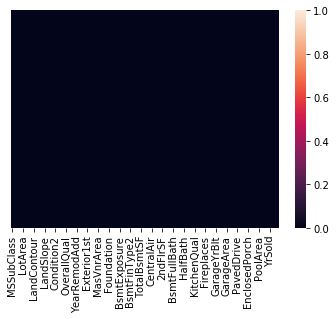

In [412]:
sns.heatmap(test_df.isnull(), yticklabels=False)

In [413]:
test_df.shape

(1459, 75)

In [414]:
print(test_df['Exterior1st'].isnull().sum())
print(test_df['Exterior1st'].value_counts())

1
VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64


In [415]:
test_df['Exterior1st']=test_df['Exterior1st'].fillna(test_df['Exterior1st'].mode()[0])

In [416]:
test_df['Exterior2nd']=test_df['Exterior2nd'].fillna(test_df['Exterior2nd'].mode()[0])

In [417]:
print(test_df['Exterior1st'].isnull().sum())
print(test_df['Exterior2nd'].isnull().sum())

0
0


In [418]:
test_df['KitchenQual']=test_df['KitchenQual'].fillna(test_df['KitchenQual'].mode()[0])

In [419]:
test_df['GarageCars']=test_df['GarageCars'].fillna(test_df['GarageCars'].mode()[0])

In [420]:
test_df['GarageArea']=test_df['GarageArea'].fillna(test_df['GarageArea'].mode()[0])

In [421]:
test_df['SaleType']=test_df['SaleType'].fillna(test_df['SaleType'].mode()[0])

In [422]:
test_df['Functional']=test_df['Functional'].fillna(test_df['Functional'].mode()[0])

In [423]:
test_df.isnull().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
MSSubClass       1459 non-null bool
MSZoning         1459 non-null bool
LotFrontage      1459 non-null bool
LotArea          1459 non-null bool
Street           1459 non-null bool
LotShape         1459 non-null bool
LandContour      1459 non-null bool
Utilities        1459 non-null bool
LotConfig        1459 non-null bool
LandSlope        1459 non-null bool
Neighborhood     1459 non-null bool
Condition1       1459 non-null bool
Condition2       1459 non-null bool
BldgType         1459 non-null bool
HouseStyle       1459 non-null bool
OverallQual      1459 non-null bool
OverallCond      1459 non-null bool
YearBuilt        1459 non-null bool
YearRemodAdd     1459 non-null bool
RoofStyle        1459 non-null bool
RoofMatl         1459 non-null bool
Exterior1st      1459 non-null bool
Exterior2nd      1459 non-null bool
MasVnrType       1459 non-null bool
MasVnrArea       1459 non-nul

In [424]:
test_df.shape

(1459, 75)

In [435]:
test_df.columns[test_df.isnull().any()]

Index(['BsmtUnfSF', 'TotalBsmtSF'], dtype='object')

In [438]:
test_df['BsmtUnfSF']=test_df['BsmtUnfSF'].fillna(test_df['BsmtUnfSF'].mode()[0])

In [441]:
test_df['TotalBsmtSF']=test_df['TotalBsmtSF'].fillna(test_df['TotalBsmtSF'].mode()[0])

In [444]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [445]:
test_df.to_csv("E:\\DataScience\\My Practice Datasets\\house_prices_test.csv", index=False)

In [446]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [447]:
columnsHeaders=['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition','SalePrice']

In [448]:
len(columnsHeaders)

76

In [449]:
final_df = pd.concat([df, test_df], axis=0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


In [450]:
final_df.shape

(2880, 76)

In [451]:
final_df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,1Fam,TA,No,706.0,0.0,GLQ,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,3,1Fam,TA,Gd,978.0,0.0,ALQ,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,3,1Fam,TA,Mn,486.0,0.0,GLQ,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,3,1Fam,Gd,No,216.0,0.0,ALQ,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,4,1Fam,TA,Av,655.0,0.0,GLQ,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [452]:
final_df = final_df.reindex(columns=columnsHeaders)

In [453]:
final_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000.0


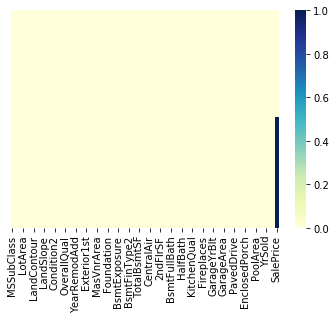

In [454]:
sns.heatmap(final_df.isnull(), yticklabels=False, cmap='YlGnBu')

In [455]:
final_df.to_csv("E:\\DataScience\\My Practice Datasets\\final_house_prices.csv", index=False)

In [456]:
final_df.select_dtypes(include=object).columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [457]:
len(final_df.select_dtypes(include=object).columns)

39

In [458]:
final_df=pd.get_dummies(final_df, columns=final_df.select_dtypes(include=object).columns, drop_first=True)

In [459]:
final_df.shape

(2880, 236)

In [460]:
final_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [461]:
cols = final_df.columns.tolist()
len(cols)

236

In [462]:
final_df.columns.get_loc('SalePrice')

36

In [463]:
cols.remove('SalePrice')

In [464]:
len(cols)

235

In [465]:
cols.append('SalePrice')

In [466]:
len(cols)

236

In [467]:
cols[-1]

'SalePrice'

In [468]:
final_df=final_df.reindex(columns=cols)

In [469]:
final_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,1,0,208500.0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,1,0,181500.0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,1,0,223500.0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,0,0,0,0,0,140000.0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,1,0,250000.0


In [470]:
final_df.to_csv("E:\\DataScience\\My Practice Datasets\\Dummies_house_prices.csv", index=False)

In [471]:
train_df = final_df.iloc[:1421,:]
test_df = final_df.iloc[1421:,:]
print(train_df.shape)
print(test_df.shape)

(1421, 236)
(1459, 236)


In [472]:
train_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,1,0,208500.0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,1,0,181500.0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,1,0,223500.0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,0,0,0,0,0,140000.0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,1,0,250000.0


In [473]:
test_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,1,0,0,0,1,0,NaN
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,0,1,0,0,0,1,0,NaN
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,0,1,0,0,0,1,0,NaN
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,0,1,0,0,0,1,0,NaN
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,0,1,0,0,0,1,0,NaN


In [474]:
X_train=train_df.iloc[:,:-1].values
y_train=train_df.iloc[:,-1].values
print(X_train.shape)
print(y_train.shape)

(1421, 235)
(1421,)


In [475]:
X_test=test_df.iloc[:,:-1].values
print(X_test.shape)

(1459, 235)


In [476]:
from sklearn.preprocessing import StandardScaler
scl=StandardScaler()
X_train=scl.fit_transform(X_train)
X_test=scl.transform(X_test)

In [477]:
from sklearn.linear_model import LinearRegression
linmodel = LinearRegression()

In [478]:
linmodel.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [479]:
import pickle
filename = 'finalized_house_prices_linmodel.pkl'
pickle.dump(linmodel, open(filename, 'wb'))

In [480]:
y_test_pred=linmodel.predict(X_test)
y_test_pred.shape

(1459,)

In [481]:
print(y_test_pred)

[112594.63816867 160326.16731647 189100.92843507 ... 181783.99543978
 108322.9068645  221575.26940754]


In [482]:
Pred=pd.DataFrame(y_test_pred)
sample_csv=pd.read_csv("E:\\DataScience\\My Practice Datasets\\House Prices\\sample_submission.csv")
dataset=pd.concat([sample_csv['Id'], Pred], axis=1, ignore_index=True)
dataset.columns=['Id','SalePrice']
dataset.to_csv("E:\\DataScience\\My Practice Datasets\\sample_submission.csv", index=False)

# Submitted this output file on Kaggle and got a score of 1.90472 with a rank of 4476/4570